# Modules and data import

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
metadata_df = pd.read_csv("data/network_metadata.tab", sep="\t", decimal=",")
metadata_df.loc[:, "IMDB_id"] = metadata_df["IMDB_id"].str[2:].astype('int')
metadata_df.head()

,GexfID,Title,IMDB_id,ReleaseDate,Slug,WeightedDegree,Modularity,PathLength,Diameter,ClusteringCoefficient,ConnectedComponents,Density,Edges,Characters
0,1,10 Things I Hate About You,147800,1999,10-Things-I-Hate-About-You,13.040,0.194,1.779,3.0,0.567,3.0,0.233,225,25
1,2,12,488478,2007,12,4.227,0.517,2.170,3.0,0.610,6.0,0.077,102,42
2,3,Twelve and Holding,417385,2005,Twelve-and-Holding,7.333,0.473,2.449,4.0,0.593,2.0,0.140,139,26
3,5,127 Hours,1542344,2010,127-Hours,3.833,0.160,1.722,2.0,0.339,4.0,0.152,33,11
4,6,1492: Conquest of Paradise,103594,1992,1492:-Conquest-of-Paradise,7.941,0.350,2.043,4.0,0.705,1.0,0.153,164,34


In [89]:
imdb_data_df = pd.read_json("data/gexf_imdb_metadata.json", orient='index')
imdb_data_df

,box_office,character_actor_mapping,directors,genres,imdb_rating,imdb_votes,movie_id,runtime_min,writers
1,"{'Budget': '$30,000,000 (estimated)', 'Opening...",{'Bartender': {'BARTENDER': 'Carlos Lacamara'}...,[Gil Junger],"[Comedy, Drama, Romance]",7.3,279031.0,147800,97.0,"[Karen McCullah, Kirsten Smith, William Shakes..."
10,"{'Budget': '$12,000,000 (estimated)', 'Opening...",{'Poole's Father': {'FATHER': 'Alan Gifford'}},[Stanley Kubrick],"[Adventure, Sci-Fi]",8.3,565235.0,62622,149.0,"[Stanley Kubrick, Arthur C. Clarke, Arthur C. ..."
100,"{'Budget': '$20,000,000 (estimated)', 'Opening...","{'Chief of Police': {'CHIEF': 'Gary Grubbs'}, ...",[Werner Herzog],"[Crime, Drama]",6.6,72110.0,1095217,122.0,[William M. Finkelstein]
101,"{'Budget': '$23,000,000 (estimated)', 'Opening...",{'Milwaukee Mom with Photo': {'MOM': 'Alex Bor...,[Terry Zwigoff],"[Comedy, Crime, Drama]",7.0,130245.0,307987,92.0,"[Glenn Ficarra, John Requa]"
102,"{'Budget': '$450,000 (estimated)'}",{'Father': {'FATHER': 'Warren Oates'}},[Terrence Malick],"[Crime, Drama]",7.8,60849.0,69762,94.0,[Terrence Malick]
...,...,...,...,...,...,...,...,...,...
92,"{'Budget': '$25,000,000 (estimated)', 'Cumulat...","{'Doctor - Vet': {'DOC': 'Hammou Aghrar'}, 'Re...",[Alejandro G. Iñárritu],[Drama],7.4,278779.0,449467,143.0,"[Guillermo Arriaga, Guillermo Arriaga, Alejand..."
93,"{'Budget': '$5,000,000 (estimated)', 'Opening ...",{'Father O'Donall': {'FATHER': 'Hugh McPhillip...,[Neal Israel],[Comedy],6.3,33885.0,86927,105.0,"[Bob Israel, Neal Israel, Pat Proft]"
97,"{'Budget': '$40,000,000 (estimated)', 'Opening...",{'Chief John Fitzgerald': {'CHIEF': 'Anthony M...,[Ron Howard],"[Crime, Drama, Mystery, Thriller]",6.7,68080.0,101393,137.0,[Gregory Widen]
98,"{'Budget': '$19,000,000 (estimated)', 'Opening...",{'Club Bartender': {'BARTENDER': 'Jimmy Franzo...,[Michael Bay],"[Action, Comedy, Crime, Thriller]",6.9,220505.0,112442,119.0,"[George Gallo, Michael Barrie, Jim Mulholland,..."


In [90]:
df = pd.merge(metadata_df, imdb_data_df, left_on="IMDB_id", right_on="movie_id")
df

,GexfID,Title,IMDB_id,ReleaseDate,Slug,WeightedDegree,Modularity,PathLength,Diameter,ClusteringCoefficient,...,Characters,box_office,character_actor_mapping,directors,genres,imdb_rating,imdb_votes,movie_id,runtime_min,writers
0,1,10 Things I Hate About You,147800,1999,10-Things-I-Hate-About-You,13.040,0.194,1.779,3.0,0.567,...,25,"{'Budget': '$30,000,000 (estimated)', 'Opening...",{'Bartender': {'BARTENDER': 'Carlos Lacamara'}...,[Gil Junger],"[Comedy, Drama, Romance]",7.3,279031.0,147800,97.0,"[Karen McCullah, Kirsten Smith, William Shakes..."
1,2,12,488478,2007,12,4.227,0.517,2.170,3.0,0.610,...,42,"{'Budget': '$4,000,000 (estimated)', 'Opening ...",{'Dochka svidetelya': {'DOC': 'Lyubov Rudneva'}},[Nikita Mikhalkov],"[Crime, Drama, Thriller]",7.7,13437.0,488478,159.0,"[Nikita Mikhalkov, Aleksandr Novototskiy-Vlaso..."
2,3,Twelve and Holding,417385,2005,Twelve-and-Holding,7.333,0.473,2.449,4.0,0.593,...,26,"{'Budget': '$400,000 (estimated)', 'Opening We...","{'Priest': {'PRIEST': 'Robertson Carricart'}, ...",[Michael Cuesta],[Drama],7.5,6550.0,417385,94.0,[Anthony Cipriano]
3,5,127 Hours,1542344,2010,127-Hours,3.833,0.160,1.722,2.0,0.339,...,11,"{'Budget': '$18,000,000 (estimated)', 'Opening...","{'Aron's Mom': {'MOM': 'Kate Burton'}, 'Report...",[Danny Boyle],"[Biography, Drama]",7.6,333048.0,1542344,94.0,"[Danny Boyle, Simon Beaufoy, Aron Ralston]"
4,6,1492: Conquest of Paradise,103594,1992,1492:-Conquest-of-Paradise,7.941,0.350,2.043,4.0,0.705,...,34,"{'Budget': '$47,000,000 (estimated)', 'Cumulat...",{},[Ridley Scott],"[Adventure, Biography, Drama, History]",6.5,26854.0,103594,154.0,[Rose Bosch]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,910,Yes Man,1068680,2008,Yes-Man,9.143,0.351,1.899,2.0,0.729,...,51,"{'Budget': '$70,000,000 (estimated)', 'Opening...",{'Father at Homeless Shelter': {'FATHER': 'Mik...,[Peyton Reed],"[Comedy, Romance]",6.8,319225.0,1068680,104.0,"[Nicholas Stoller, Jarrad Paul, Andrew Mogel, ..."
769,911,You Can Count on Me,203230,2000,You-Can-Count-on-Me,11.400,0.275,1.752,3.0,0.583,...,18,"{'Budget': '$1,200,000 (estimated)', 'Opening ...",{},[Kenneth Lonergan],[Drama],7.5,26652.0,203230,111.0,[Kenneth Lonergan]
770,912,You've Got Mail,128853,1998,You've-Got-Mail,8.769,0.374,2.131,4.0,0.727,...,36,"{'Budget': '$65,000,000 (estimated)', 'Opening...",{'T.V. Reporter': {'REPORTER': 'Nina Zoie Lam'}},[Nora Ephron],"[Comedy, Drama, Romance]",6.6,183169.0,128853,119.0,"[Miklós László, Nora Ephron, Delia Ephron]"
771,913,Youth in Revolt,403702,2009,Youth-in-Revolt,11.000,0.287,1.916,4.0,0.640,...,34,"{'Budget': '$18,000,000 (estimated)', 'Opening...",{},[Miguel Arteta],"[Comedy, Drama, Romance]",6.4,71077.0,403702,90.0,"[Gustin Nash, C.D. Payne]"


# Exploring Graph connections

## How are genres related?
A graphical representation of genres and how they're connected.
Connections between genres are based on movie genres (i.e. given 2 movies that have genres `['Action', 'Thriller']` and `['Action', 'Comedy']`, we deduce an edge `Action -> Thriller` and `Action -> Comedy`, each with a weight of 1.
These are aggregated across all movies.

In [111]:
G = nx.Graph()
genres = df["genres"].values
unique_genres = np.unique([g for ge in genres for g in ge])
for g in unique_genres: # Add the nodes
    G.add_node(g)
    

count = dict()  # Aggregate the counts here
for g in unique_genres:
    if g not in count:
        count[g] = dict()
    for i in range(genres.shape[0]):
        for g2 in genres[i]:
            if g == g2:
                continue
            if g2 not in count[g]:
                count[g][g2] = 0
            count[g][g2] += 1

for u, d in count.items():
    for v, w in d.items():
        if u != v:
            G.add_edge(u, v, weight=w)

In [230]:
def draw_connection_with_edges(G, min_weight=None, max_weight=None, figsize=None, layout=None,
                               c=100, font_size=16, font_color='orange'):
    if figsize is not None:
        plt.figure(figsize=figsize)
        
    pos = layout or nx.random_layout(G)
    weights = {(u, v): d["weight"] for (u, v, d) in G.edges(data=True)}
    if min_weight is not None:
        weights = {k: v for k, v in weights.items() if v > min_weight}
    if max_weight is not None:
        weights = {k: v for k, v in weights.items() if v <= max_weight}
    filtered_edges = list(weights.keys())
    filtered_nodes = {a for a, b in filtered_edges} | {b for a, b in filtered_edges}
    
    t = np.array(list(weights.values()))
    normalized_weights = c*t/t.sum()

    nx.draw_networkx_nodes(G, pos=pos, nodelist=filtered_nodes, node_color='lightblue')
    nx.draw_networkx_labels(G, pos=pos, labels={k: k for k in filtered_nodes},
                            font_color=font_color, font_weight='bold', font_size=font_size)
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=weights, font_size=font_size//2)
    nx.draw_networkx_edges(G, pos=pos, edgelist=filtered_edges, edge_color='grey', width=normalized_weights)
    plt.show()

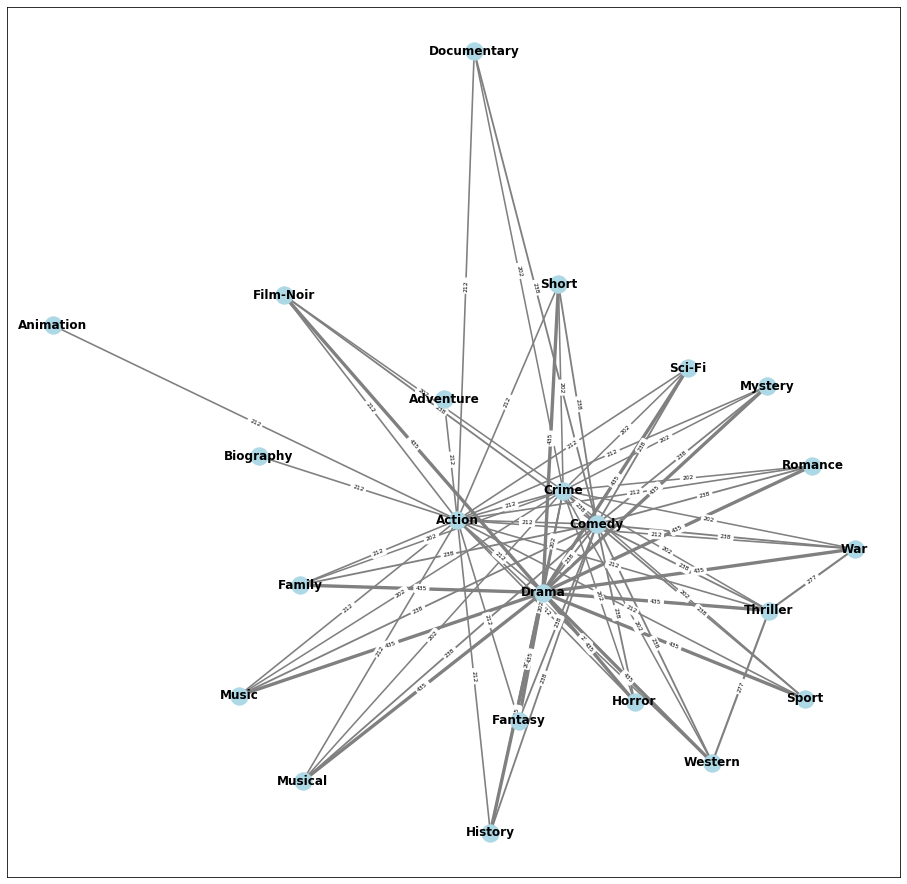

In [232]:
draw_connection_with_edges(G, min_weight=200, c=150, font_color='black', font_size=12, figsize=(16, 16),
                           layout=nx.spring_layout(G))

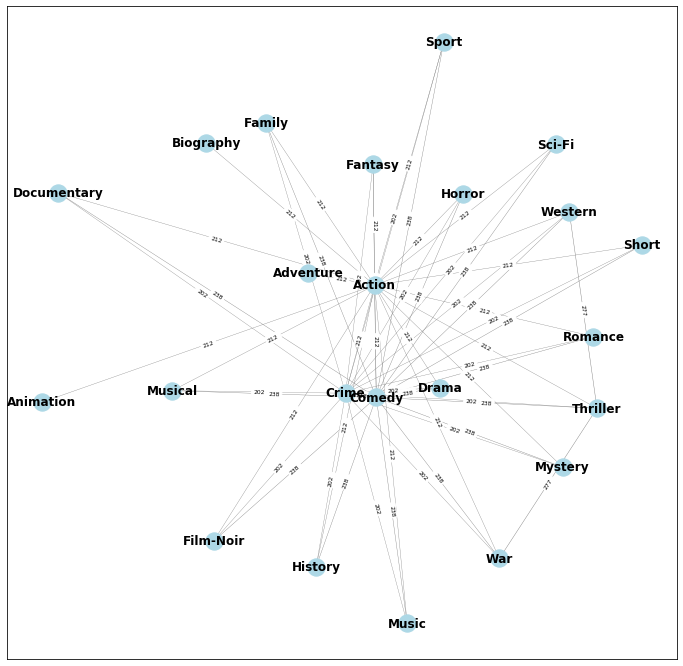

In [250]:
draw_connection_with_edges(G, min_weight=200, max_weight=300, c=20, font_color='black', font_size=12, figsize=(12, 12), layout=nx.spring_layout(G))

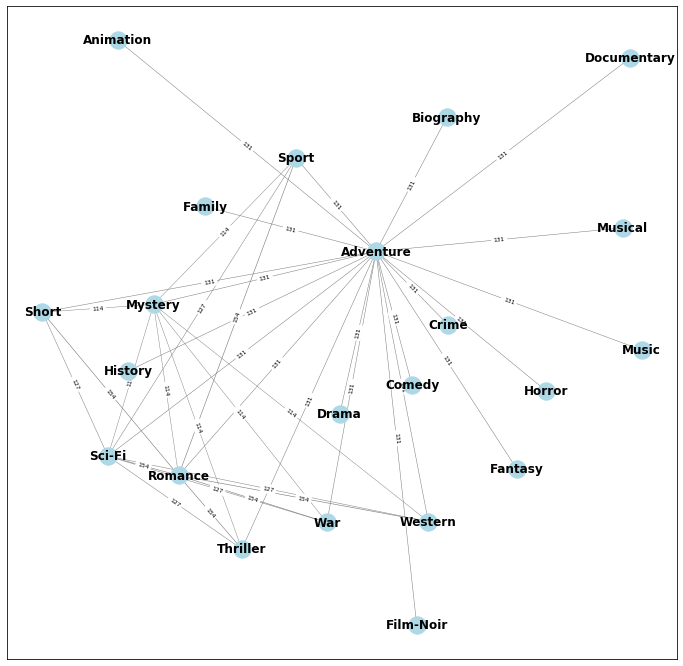

In [249]:
draw_connection_with_edges(G, min_weight=100, max_weight=200, c=20, font_color='black', font_size=12, figsize=(12, 12), layout=nx.spring_layout(G))

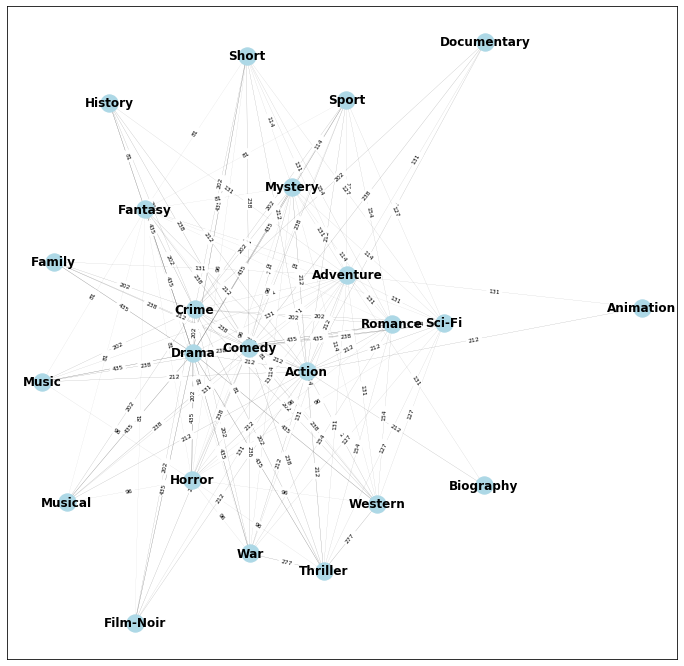

In [248]:
draw_connection_with_edges(G, min_weight=50, c=20, font_color='black', font_size=12, figsize=(12, 12), layout=nx.spring_layout(G))

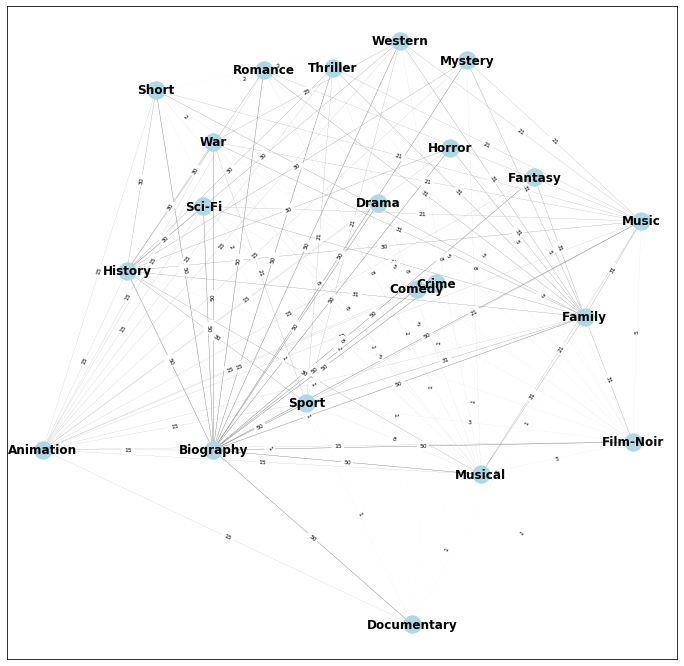

In [247]:
draw_connection_with_edges(G, max_weight=50, c=20, font_color='black', font_size=12, figsize=(12, 12), layout=nx.spring_layout(G))

## Finding main characters
(WIP) - mainly experimenting with NetworkX algorithms and how can they be of service for us

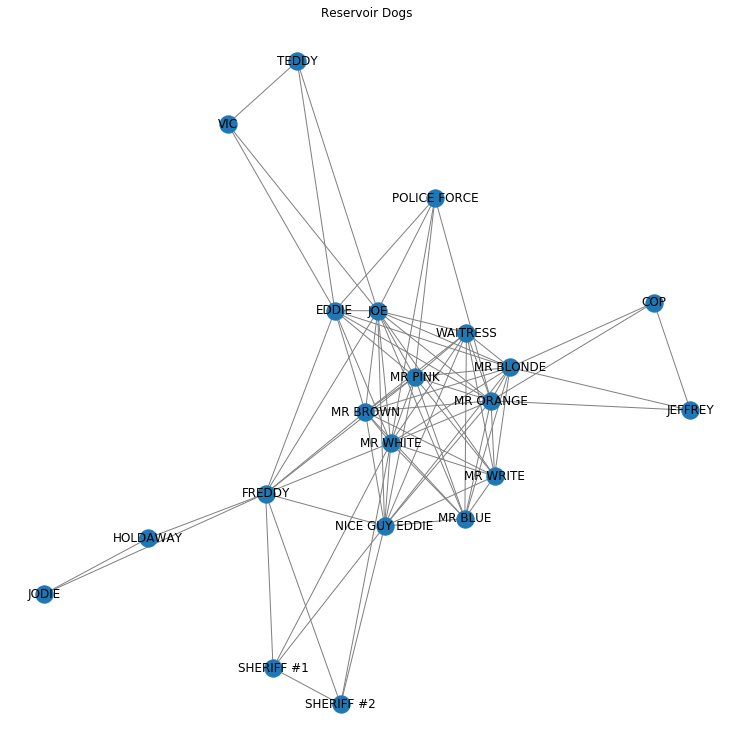

In [314]:
%matplotlib inline
# random_row = df.sample(1)
# random_row = df[df["Title"].str.contains("Judgment")]
# random_row = df[df["Title"].str.contains("Titanic")]
# random_row = df[df["Title"].str.contains("Silent")]
random_row = df[df["Title"].str.contains("Reservoir Dogs")]
# random_row = df[df["Title"].str.contains("The Boondock Saint")]
random_graph = nx.read_gexf("data/gexf/{}.gexf".format(random_row["GexfID"].values[-1]), relabel=True)
plt.figure(figsize=(10, 10))
nx.draw_spring(random_graph, with_labels=True, edge_color="grey")
plt.title(random_row["Title"].values[-1])
plt.show()

In [315]:
from tabulate import tabulate
print(tabulate(random_graph.degree, tablefmt='pipe'))
print({n: dc for n, dc in nx.degree_centrality(random_graph).items() if dc >= np.array(list(nx.degree_centrality(random_graph).values())).mean()})
print({n: cc for n, cc in nx.closeness_centrality(random_graph).items() if cc >= np.array(list(nx.closeness_centrality(random_graph).values())).mean()})

|:---------------|---:|
| COP            |  3 |
| EDDIE          | 10 |
| FREDDY         | 10 |
| HOLDAWAY       |  2 |
| JEFFREY        |  3 |
| JODIE          |  2 |
| JOE            | 14 |
| MR BLONDE      | 12 |
| MR BLUE        |  9 |
| MR BROWN       | 11 |
| MR ORANGE      | 13 |
| MR PINK        | 12 |
| MR WHITE       | 14 |
| MR WRITE       |  9 |
| NICE GUY EDDIE | 12 |
| POLICE FORCE   |  5 |
| SHERIFF #1     |  4 |
| SHERIFF #2     |  4 |
| TEDDY          |  3 |
| VIC            |  3 |
| WAITRESS       |  9 |
{'EDDIE': 0.5, 'FREDDY': 0.5, 'JOE': 0.7000000000000001, 'MR BLONDE': 0.6000000000000001, 'MR BLUE': 0.45, 'MR BROWN': 0.55, 'MR ORANGE': 0.65, 'MR PINK': 0.6000000000000001, 'MR WHITE': 0.7000000000000001, 'MR WRITE': 0.45, 'NICE GUY EDDIE': 0.6000000000000001, 'WAITRESS': 0.45}
{'EDDIE': 0.6666666666666666, 'FREDDY': 0.625, 'JOE': 0.7692307692307693, 'MR BLONDE': 0.6666666666666666, 'MR BLUE': 0.6060606060606061, 'MR BROWN': 0.6896551724137931, 'MR ORANGE': 0.689655

6
dict_keys(['EDDIE', 'JOE', 'MR BLONDE', 'MR BLUE', 'MR BROWN', 'MR ORANGE', 'MR PINK', 'MR WHITE', 'MR WRITE', 'NICE GUY EDDIE', 'WAITRESS'])


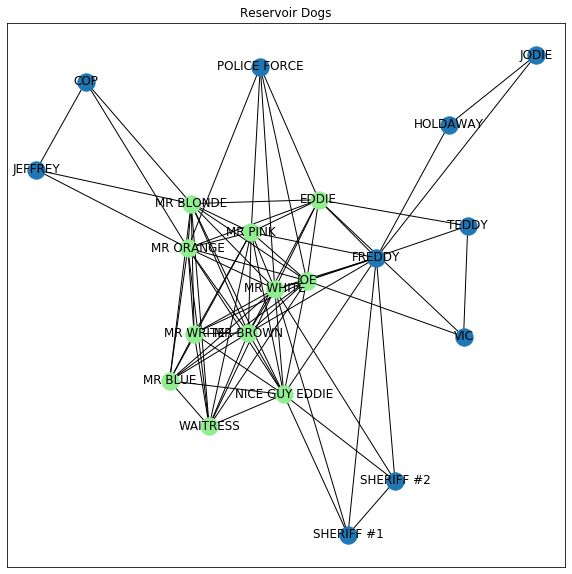

In [316]:
plt.figure(figsize=(10, 10))
ol = nx.onion_layers(random_graph)
u = max(list(ol.values()))-1
print(u)
mains = {k: v for k, v in ol.items() if v >= u}
print(mains.keys())
pos = nx.spring_layout(random_graph)
high = set(mains.keys())
nx.draw_networkx_nodes(random_graph, pos, nodelist=set(random_graph.nodes())-high)
nx.draw_networkx_nodes(random_graph, pos, nodelist=high, node_color='lightgreen')
nx.draw_networkx_labels(random_graph, pos)
nx.draw_networkx_edges(random_graph, pos)
plt.title(random_row["Title"].values[-1])
plt.show()

## Genres Development over Time

Action - 156 valid movies


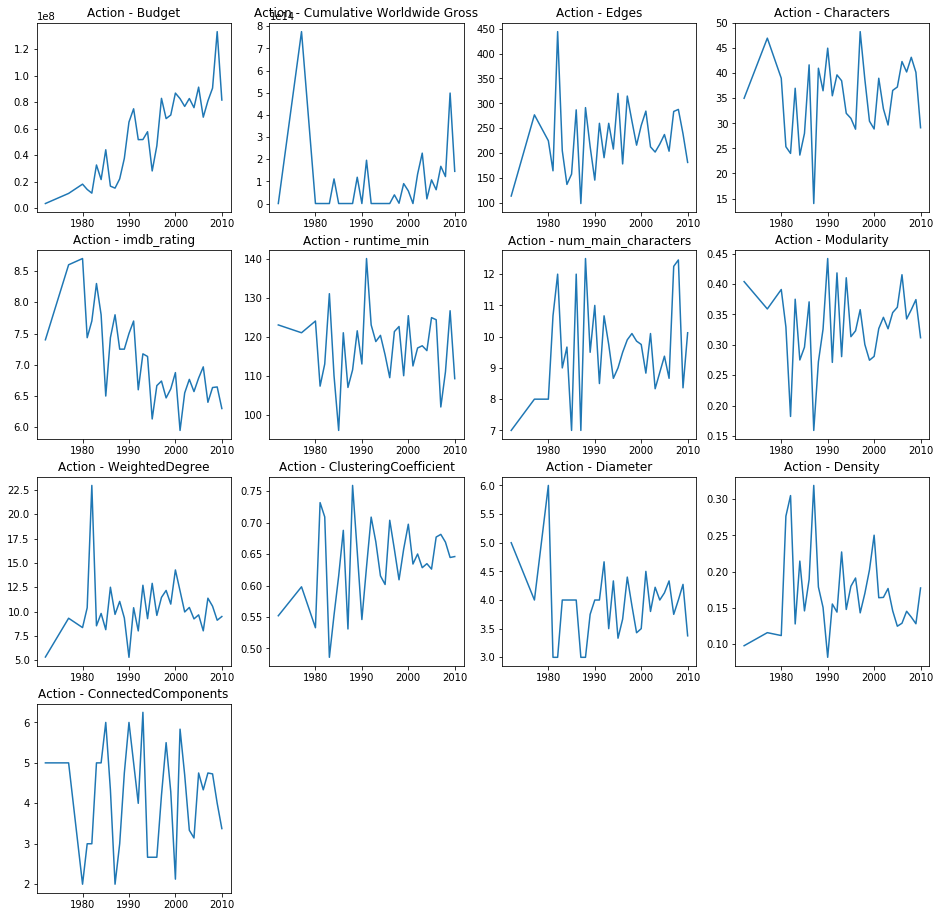

Adventure - 99 valid movies


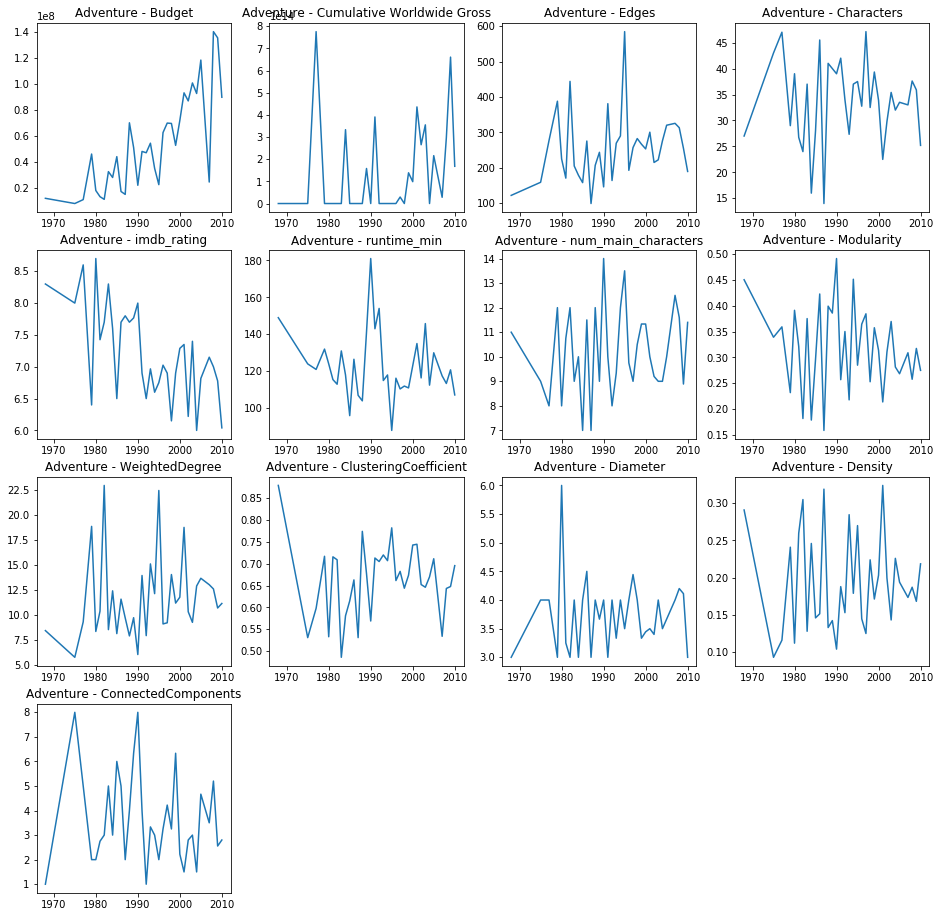

Skipping Animation - insufficient box office information
Skipping Biography - insufficient box office information
Comedy - 118 valid movies


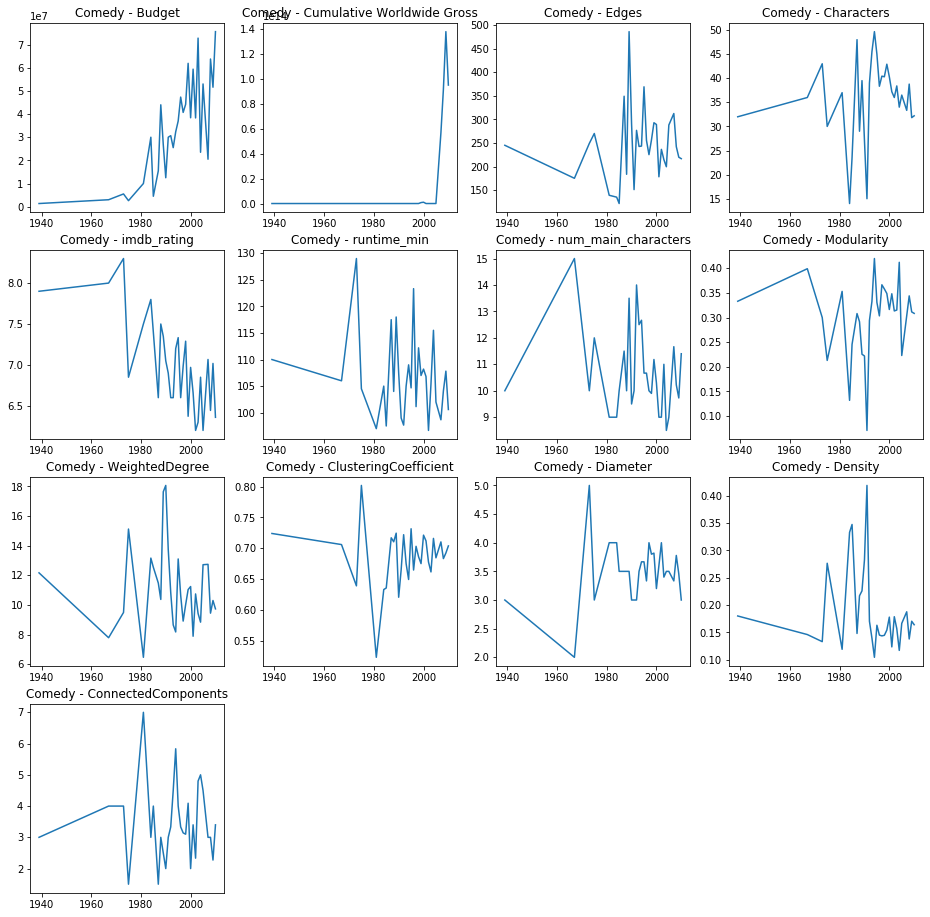

Crime - 101 valid movies


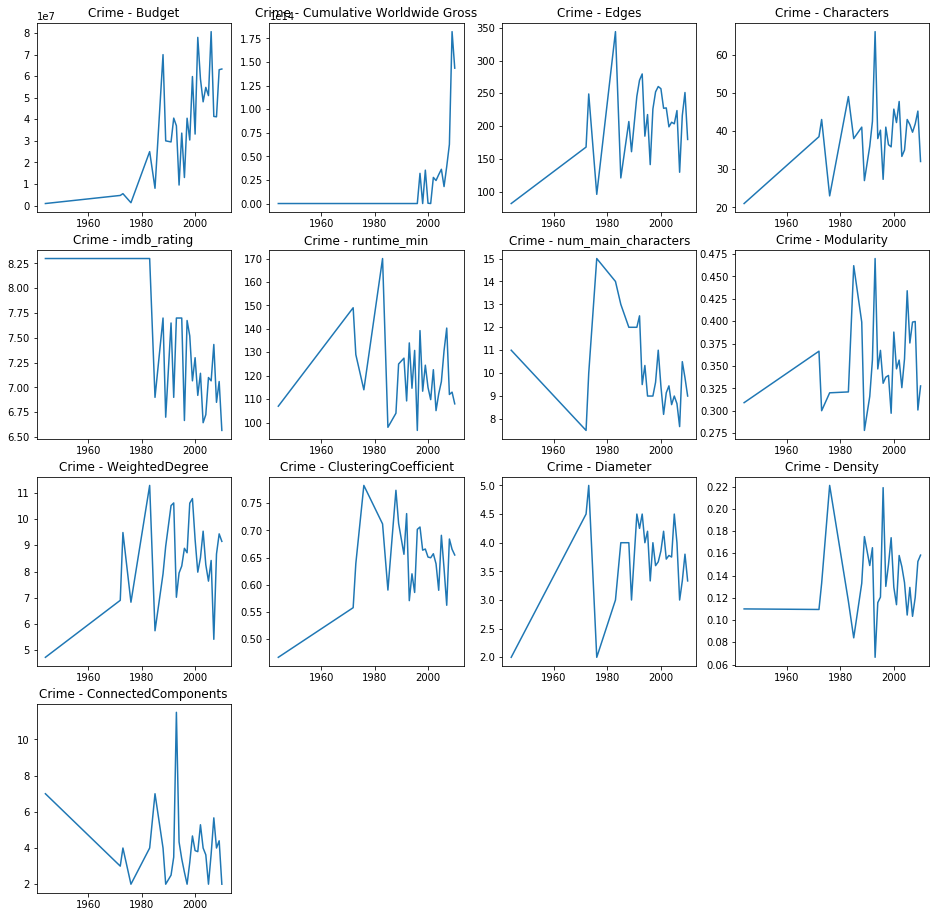

Skipping Documentary - insufficient box office information
Drama - 212 valid movies


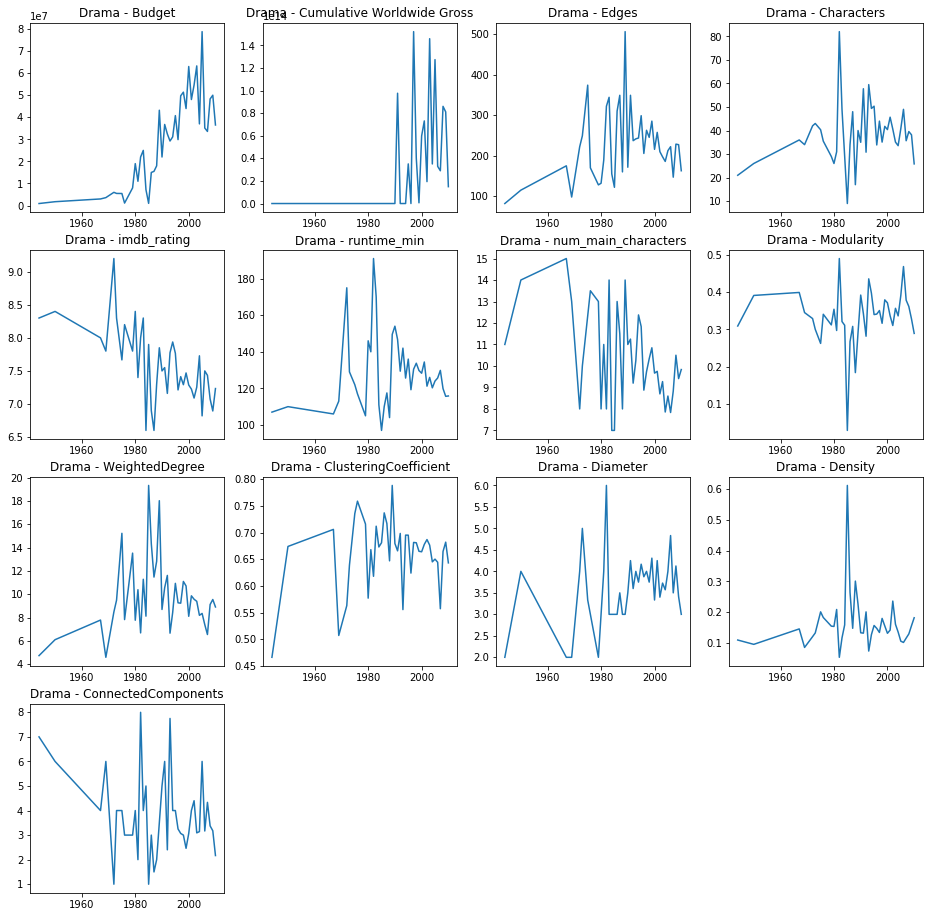

Skipping Family - insufficient box office information
Fantasy - 59 valid movies


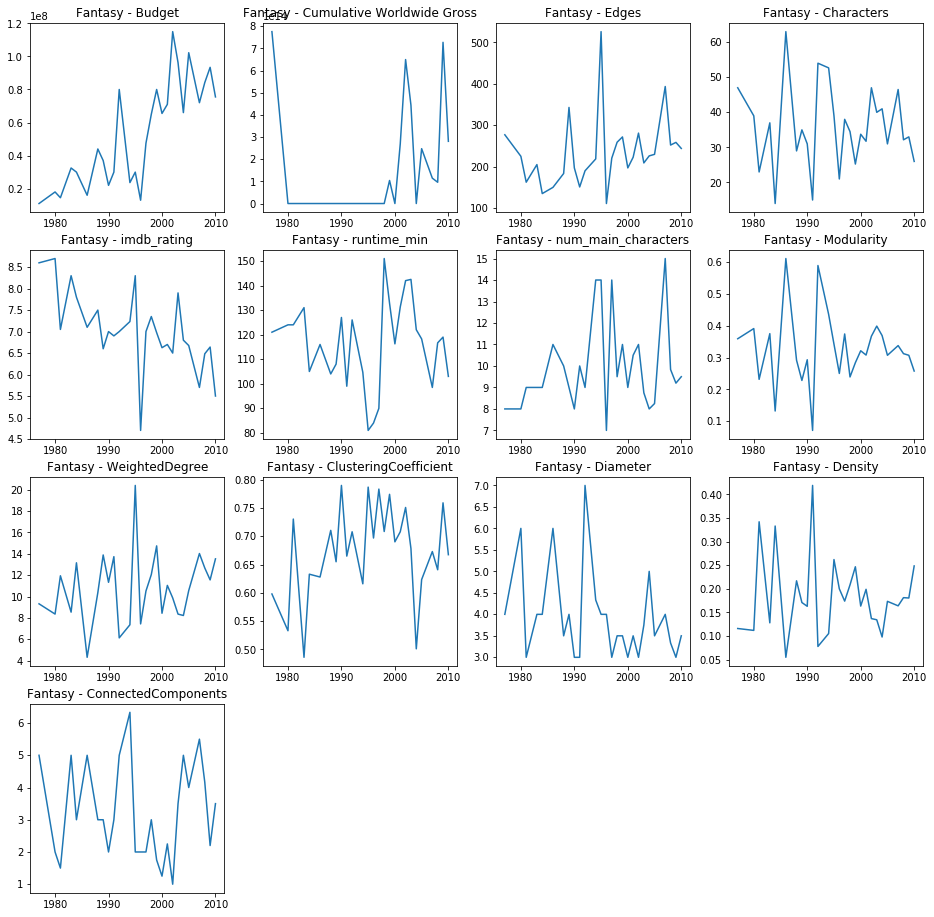

Skipping Film-Noir - insufficient box office information
Skipping History - insufficient box office information
Horror - 54 valid movies


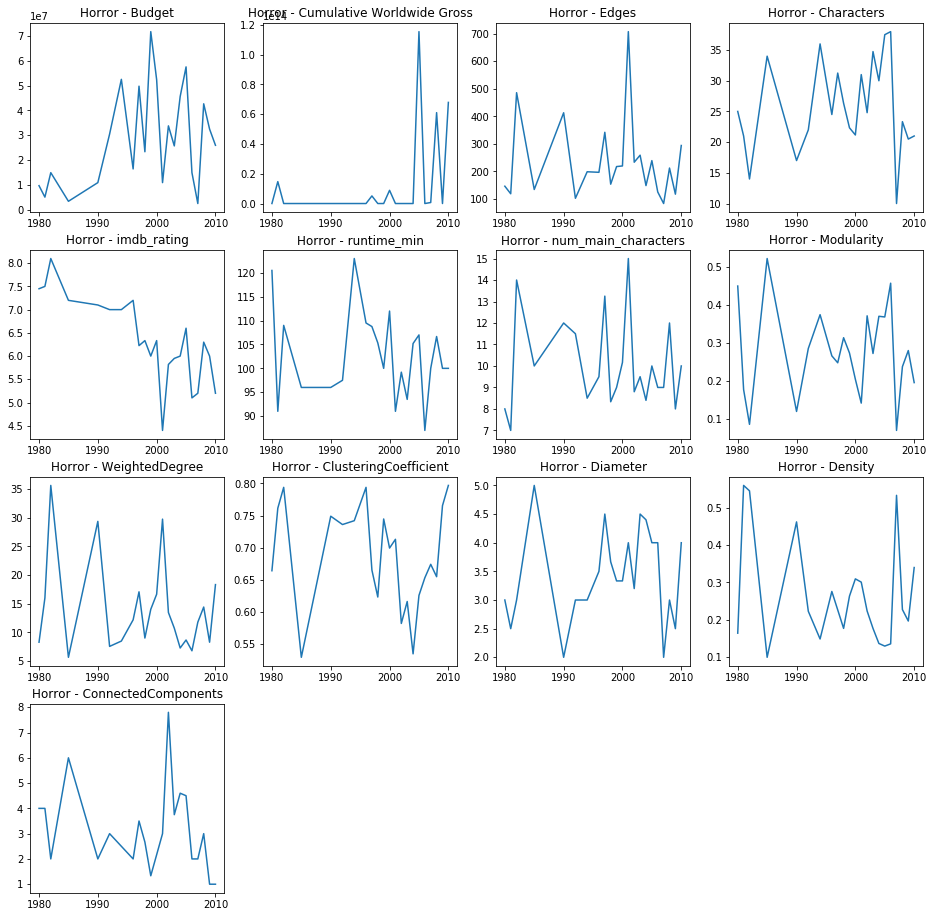

Skipping Music - insufficient box office information
Skipping Musical - insufficient box office information
Mystery - 64 valid movies


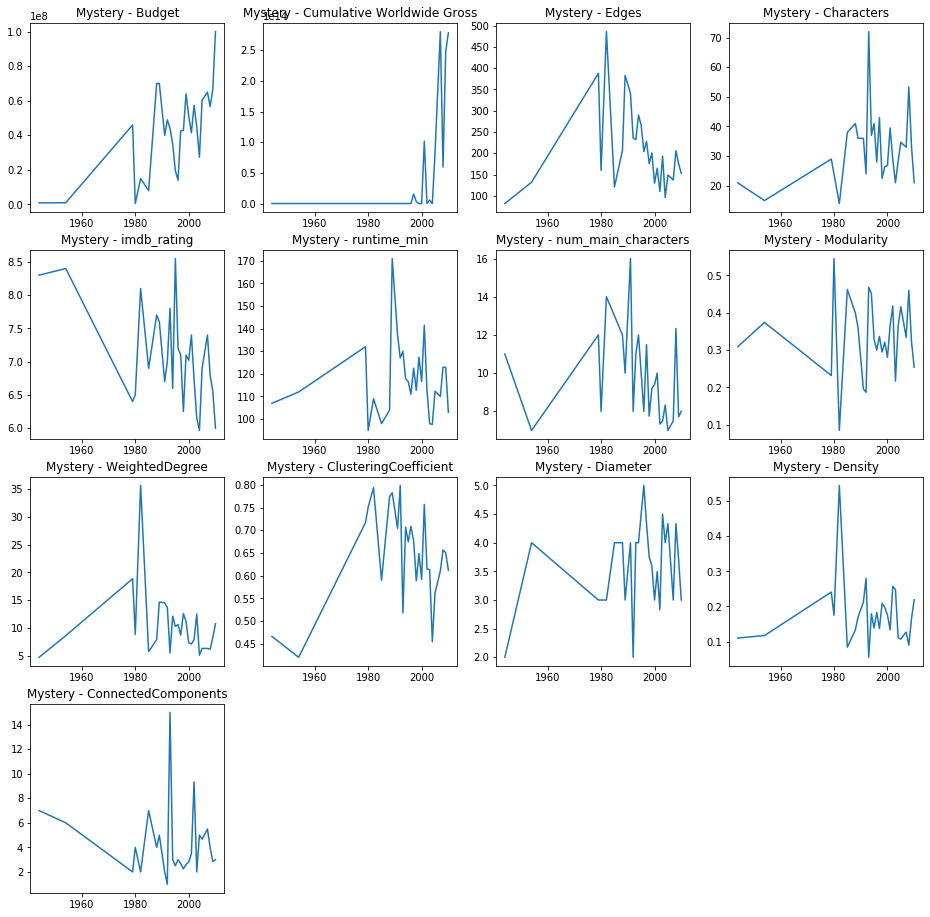

Romance - 77 valid movies


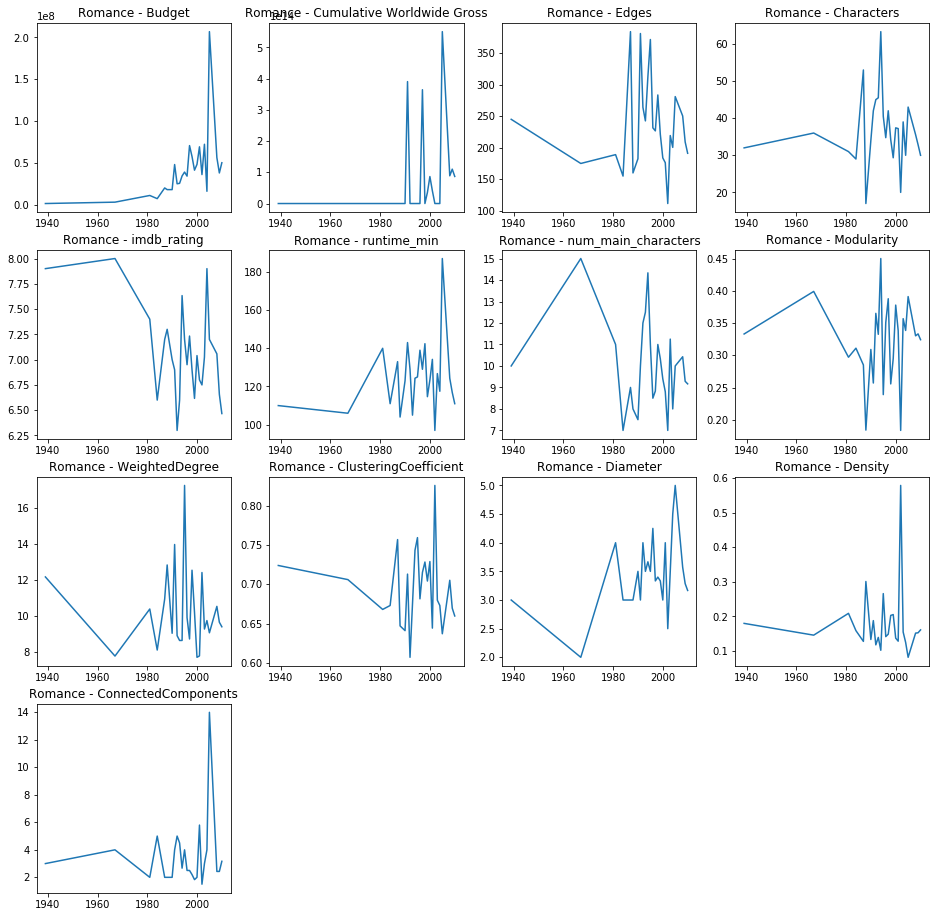

Sci-Fi - 95 valid movies


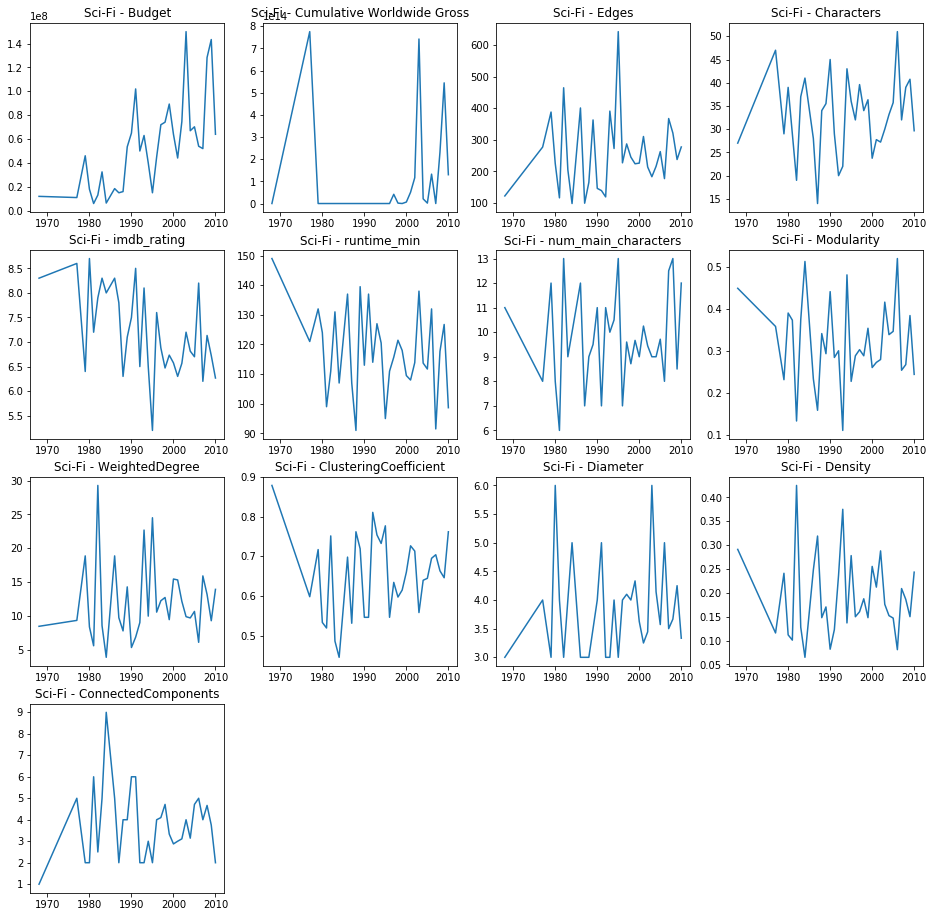

Skipping Short - insufficient box office information
Skipping Sport - insufficient box office information
Thriller - 165 valid movies


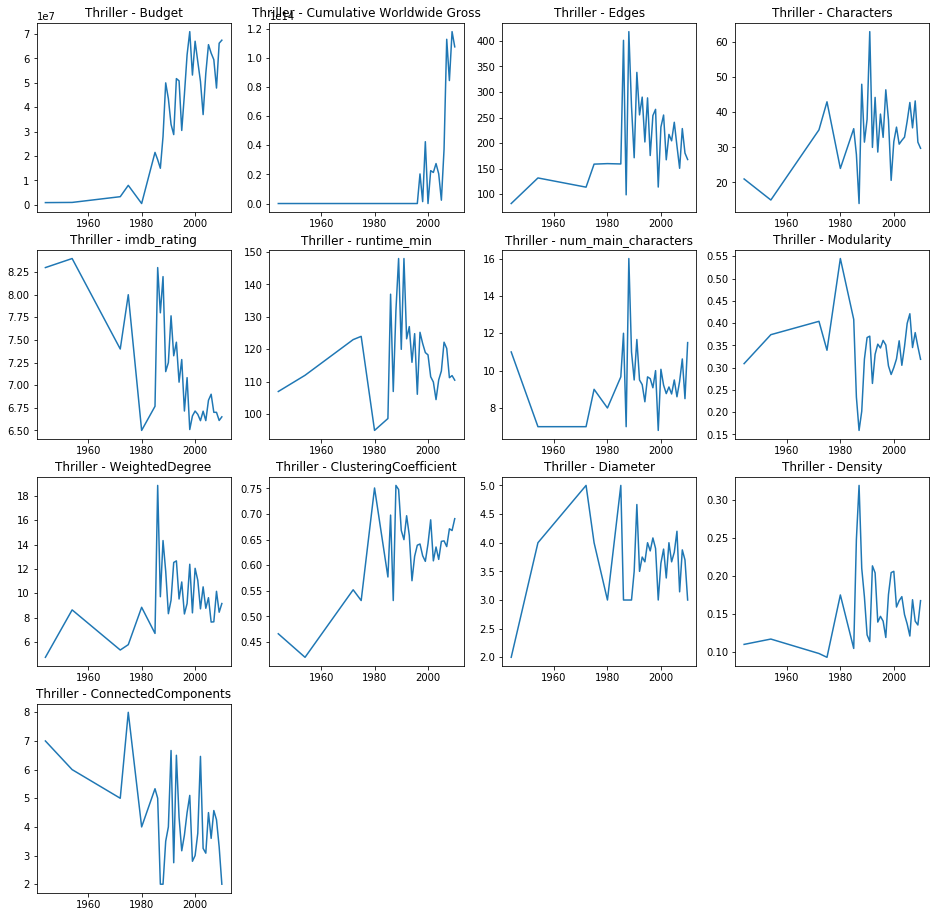

Skipping War - insufficient box office information
Skipping Western - insufficient box office information
All genres - 427 valid movies


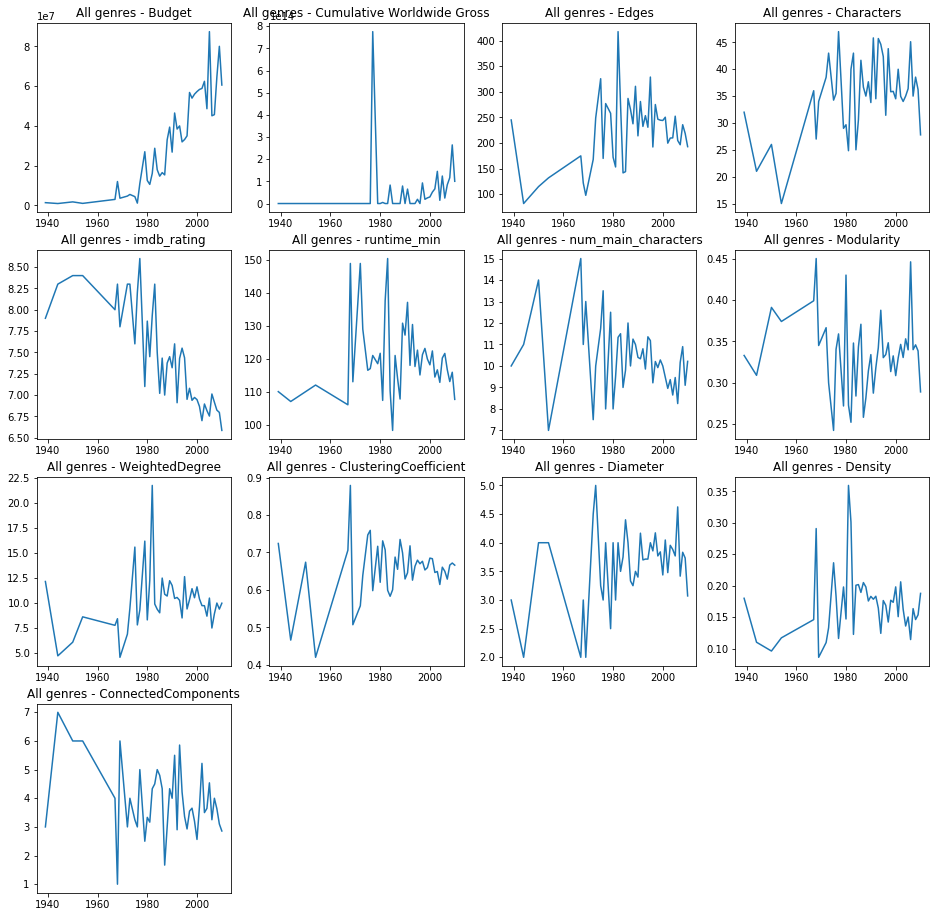

In [110]:
def text_to_int(ds):
    return ds.str.replace(r"\D", "").str.split(" ", expand=True)[0].astype(int)

def get_main_characters(gexf):
    tdf = nx.read_gexf("data/gexf/{}.gexf".format(gexf), relabel=True)
    ol = nx.onion_layers(tdf)
    u = max(list(ol.values())) - 1
    return {k: v for k, v in ol.items() if v >= u}

genres = df["genres"]
unique_genres = np.unique([g for ge in df["genres"].values for g in ge])
cols = ["Budget", "Cumulative Worldwide Gross", "Edges", "Characters", "imdb_rating",
        "runtime_min", "num_main_characters", "Modularity", "WeightedDegree", "ClusteringCoefficient",
        "Diameter", "Density", "ConnectedComponents"]
for g in unique_genres:
    relevant_movies_for_genre = df[genres.map(lambda x: g in x)]
    boxoffice_df = pd.DataFrame.from_records(relevant_movies_for_genre["box_office"].values)

    # Drop NaNs for "Cumulative Worldwide Gross" and "Budget"
    if "Budget" not in boxoffice_df.columns or "Cumulative Worldwide Gross" not in boxoffice_df.columns:
        print("Skipping {} - insufficient box office information".format(g))
        continue
    boxoffice_df = boxoffice_df[["Budget", "Cumulative Worldwide Gross"]].dropna()
    if boxoffice_df.shape[0] < 50:
        print("Skipping {} - insufficient box office information".format(g))
        continue
    # Convert to integers
    boxoffice_df.loc[:, "Budget"] = text_to_int(boxoffice_df["Budget"])
    boxoffice_df.loc[:, "Cumulative Worldwide Gross"] = text_to_int(boxoffice_df["Cumulative Worldwide Gross"])
    
    
    new_df = pd.concat([boxoffice_df.reset_index(drop=True),
                        relevant_movies_for_genre.iloc[boxoffice_df.index].reset_index(drop=True)],
                       axis=1).sort_values("ReleaseDate")
    
    # Add number of main characters for each graph?
    new_df.loc[:, "num_main_characters"] = new_df["GexfID"].map(lambda gexf: len(get_main_characters(gexf)))
    
    print(g, "-", new_df.shape[0], "valid movies")
    # Plot
#     pd.plotting.scatter_matrix(new_df[cols + ["ReleaseDate"]], figsize=(16, 16), diagonal='kde')
    tdf = new_df.sort_values("ReleaseDate").groupby("ReleaseDate").agg(np.mean)
    tdf = tdf[cols]
    n = np.ceil(np.sqrt(len(cols)))
    plt.figure(figsize=(16, 16))
    for i, c in enumerate(tdf.columns):
        plt.subplot(n, n, i+1)
        plt.plot(tdf[c])
        plt.title("{} - {}".format(g, c))
    plt.show()

# Repeat for all movies
g = "All genres"
boxoffice_df = pd.DataFrame.from_records(df["box_office"].values)
# Drop NaNs for "Cumulative Worldwide Gross" and "Budget"
boxoffice_df = boxoffice_df[["Budget", "Cumulative Worldwide Gross"]].dropna()
# Convert to integers
boxoffice_df.loc[:, "Budget"] = text_to_int(boxoffice_df["Budget"])
boxoffice_df.loc[:, "Cumulative Worldwide Gross"] = text_to_int(boxoffice_df["Cumulative Worldwide Gross"])


new_df = pd.concat([boxoffice_df.reset_index(drop=True), df.iloc[boxoffice_df.index].reset_index(drop=True)],
                   axis=1).sort_values("ReleaseDate")

# Add number of main characters for each graph?
new_df.loc[:, "num_main_characters"] = new_df["GexfID"].map(lambda gexf: len(get_main_characters(gexf)))

print(g, "-", new_df.shape[0], "valid movies")
# Plot
#     pd.plotting.scatter_matrix(new_df[cols + ["ReleaseDate"]], figsize=(16, 16), diagonal='kde')
tdf = new_df.sort_values("ReleaseDate").groupby("ReleaseDate").agg(np.mean)
tdf = tdf[cols]
n = np.ceil(np.sqrt(len(cols)))
plt.figure(figsize=(16, 16))
for i, c in enumerate(tdf.columns):
    plt.subplot(n, n, i+1)
    plt.plot(tdf[c])
    plt.title("{} - {}".format(g, c))
plt.show()